# Is Unanimous MVP Stephen Curry the Best Curry?
Stephen Curry is considered the best shooter the NBA has ever seen. He is the first player to receive an unanimous MVP in NBA history during the 2015-2016 season. Many analyst and reporters concluded that Stephen Curry's best season was during his unanimous MVP season. The goal of this notebook is to analyze Stephen Curry's regular season stats and determine whether what the analyst and reporters said are accurate.

### Connecting to local PostgreSQL Database
We will be obtaining our tables from a locally hosted database that has Stephen Curry's regular season stats for each season he was active. Our database is obtained by using a python script that access the NBA API to return the most recent stats.

In [1]:
library(DBI)
library(stringr)
library(RPostgres)

In [3]:
tryCatch({
    print("Connecting to Database…")
    con <- dbConnect(RPostgres::Postgres(),dbname = dsn_database, 
                 host = dsn_hostname,
                 port = 5432,
                 user = dsn_uid,
                 password = dsn_pwd)
    print("Database Connected!")
    },
    error=function(cond) {
            print("Unable to connect to Database.")
    })

[1] "Connecting to Database…"
[1] "Database Connected!"


In [4]:
tables <- dbListTables(con)
tables

[1] "season_2009" "season_2010" "season_2011" "season_2012" "season_2013"
 [6] "season_2014" "season_2015" "season_2016" "season_2017" "season_2018"
[11] "season_2019" "season_2020" "season_2021" "season_2022"

In [5]:
dbReadTable(con, 'season_2019')

index,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
<int64>,<chr>,<int64>,<chr>,<chr>,<chr>,<chr>,<int64>,<int64>,<int64>,...,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>
0,22019,201939,0021900929,"MAR 05, 2020",GSW vs. TOR,L,27,6,16,...,6,6,7,0,0,1,1,23,-13,1
1,22019,201939,0021900065,"OCT 30, 2019",GSW vs. PHX,L,21,3,11,...,5,5,6,1,2,4,2,9,-13,2
2,22019,201939,0021900047,"OCT 28, 2019",GSW @ NOP,W,31,9,17,...,2,3,11,3,0,1,5,26,32,1
3,22019,201939,0021900036,"OCT 27, 2019",GSW @ OKC,L,30,7,18,...,6,8,5,0,0,2,0,23,-30,1
4,22019,201939,0021900016,"OCT 24, 2019",GSW vs. LAC,L,30,8,20,...,3,4,4,1,0,8,3,23,-19,1


In [6]:
for (x in tables){
    query <- paste("SELECT COUNT(*) FROM", x)
    nGames <- dbGetQuery(con, query)
    cat('Games played in', str_sub(x, -4, -1), 'Season:', as.integer(nGames$count), '\n')
}

Games played in 2009 Season: 80 
Games played in 2010 Season: 74 
Games played in 2011 Season: 26 
Games played in 2012 Season: 78 
Games played in 2013 Season: 78 
Games played in 2014 Season: 80 
Games played in 2015 Season: 79 
Games played in 2016 Season: 79 
Games played in 2017 Season: 51 
Games played in 2018 Season: 69 
Games played in 2019 Season: 5 
Games played in 2020 Season: 63 
Games played in 2021 Season: 64 
Games played in 2022 Season: 50 


### Visualizing The Data
We will be using Points, Assist, Rebounds and Curry's shooting splits to determine his best year and compare with his Unanimous MVP season. We will use query to grab all the data we need. Then use GgPlot to create line charts for the dataframe presenting the averages for each season.

In [7]:
library(ggplot2)
library(reshape2)
options(repr.plot.width=12 ,repr.plot.height=8)

In [8]:
commonstats <- data.frame(matrix(ncol=4, nrow=14))
colnames(commonstats) <- c('Season', 'PTS', 'AST', 'REB')

In [9]:
for (x in 1:14){
    query <- paste('SELECT AVG("PTS"), AVG("AST"), AVG("REB") FROM', tables[x])
    common <- dbGetQuery(con, query)
    commonstats[x,] <- c(str_sub(tables[x], -4, -1), 
                        round(common$avg, digits=1),
                        round(common$avg..2, digits=1),
                        round(common$avg..3, digits=1))
}

In [10]:
commonstats

Season,PTS,AST,REB
<chr>,<chr>,<chr>,<chr>
2009,17.5,5.9,4.4
2010,18.6,5.8,3.9
2011,14.7,5.3,3.4
2012,22.9,6.9,4
2013,24,8.5,4.3
2014,23.8,7.7,4.3
2015,30.1,6.7,5.4
2016,25.3,6.6,4.5
2017,26.4,6.1,5.1


In [11]:
mCommonstats <- melt(commonstats, 'Season')
mCommonstats$value <- as.numeric(mCommonstats$value)

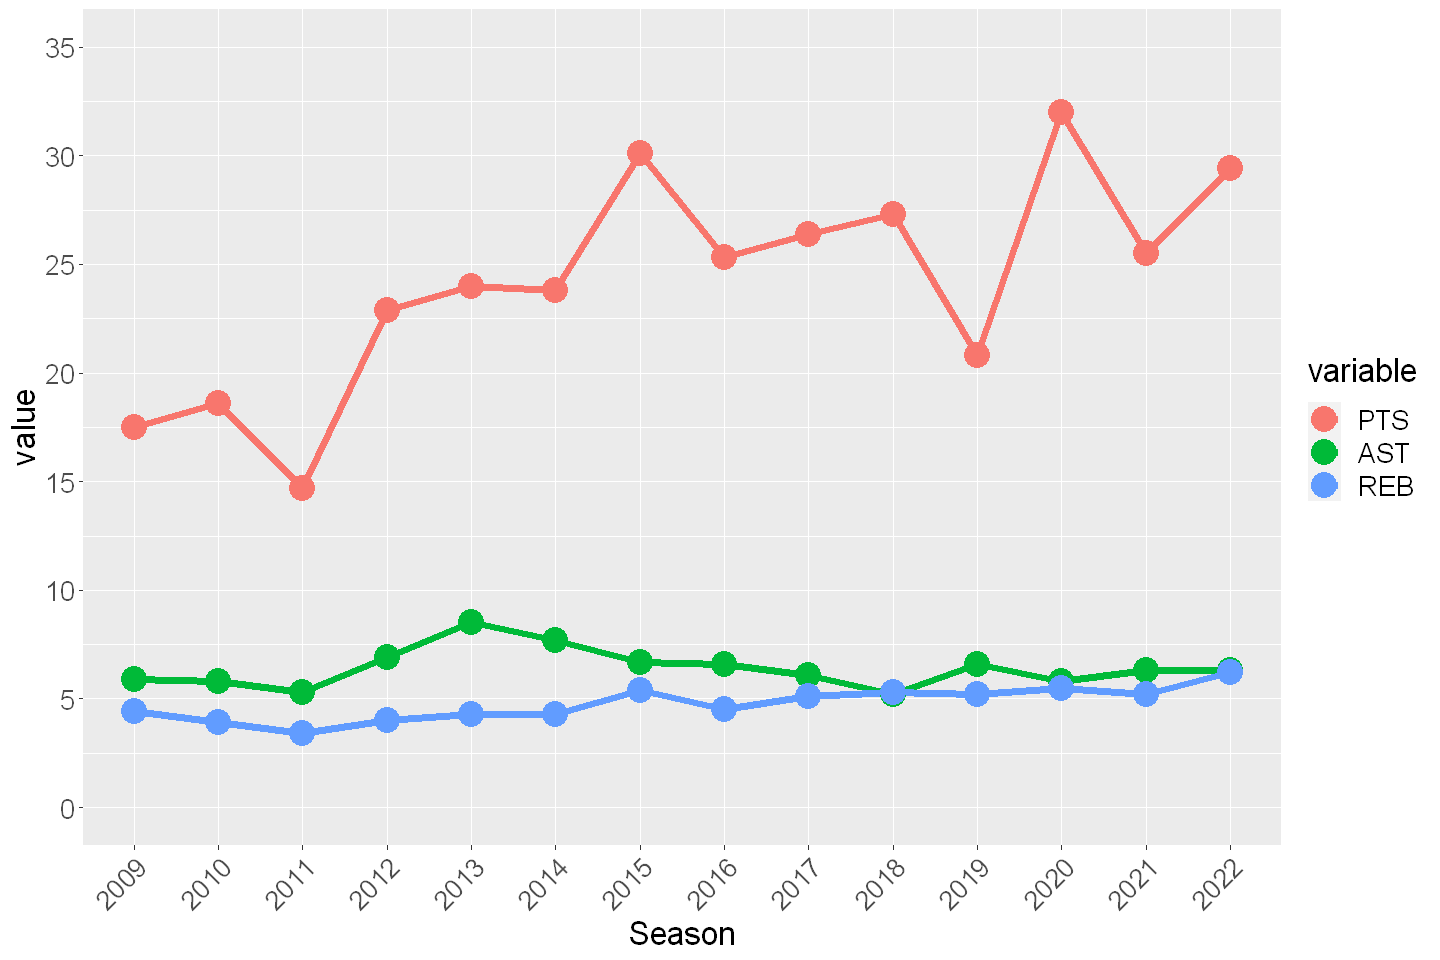

In [13]:
common_lc <-  ggplot(mCommonstats, aes(x=Season, y=value, group=variable, color=variable)) + 
            geom_line(size=2) + 
            geom_point(size=7) +
            scale_y_continuous(limits = c(0,35), breaks=seq(0,35,5))
common_lc <- common_lc + theme(axis.text.x = element_text(angle=45, vjust=1, hjust=1), text=element_text(size=20))
common_lc

In [14]:
percentstats <- data.frame(matrix(ncol=4, nrow=14))
colnames(percentstats) <- c('Season', 'FG%', '3P%', 'FT%')

In [15]:
for (x in 1:14){
    query <- paste('SELECT SUM("FGM")/SUM("FGA"), SUM("FG3M")/SUM("FG3A"), SUM("FTM")/SUM("FTA") FROM', tables[x])
    percent <- dbGetQuery(con, query)
    percentstats[x,] <- c(str_sub(tables[x], -4, -1),
                         round(percent[[1]], digits=3),
                         round(percent[[2]], digits=3),
                         round(percent[[3]], digits=3))
}

In [16]:
percentstats

Season,FG%,3P%,FT%
<chr>,<chr>,<chr>,<chr>
2009,0.462,0.437,0.885
2010,0.48,0.442,0.934
2011,0.49,0.455,0.809
2012,0.451,0.453,0.9
2013,0.471,0.424,0.885
2014,0.487,0.443,0.914
2015,0.504,0.454,0.907
2016,0.468,0.411,0.898
2017,0.495,0.423,0.921


In [17]:
mPercentstats <- melt(percentstats, 'Season')
mPercentstats$value <- as.numeric(mPercentstats$value)

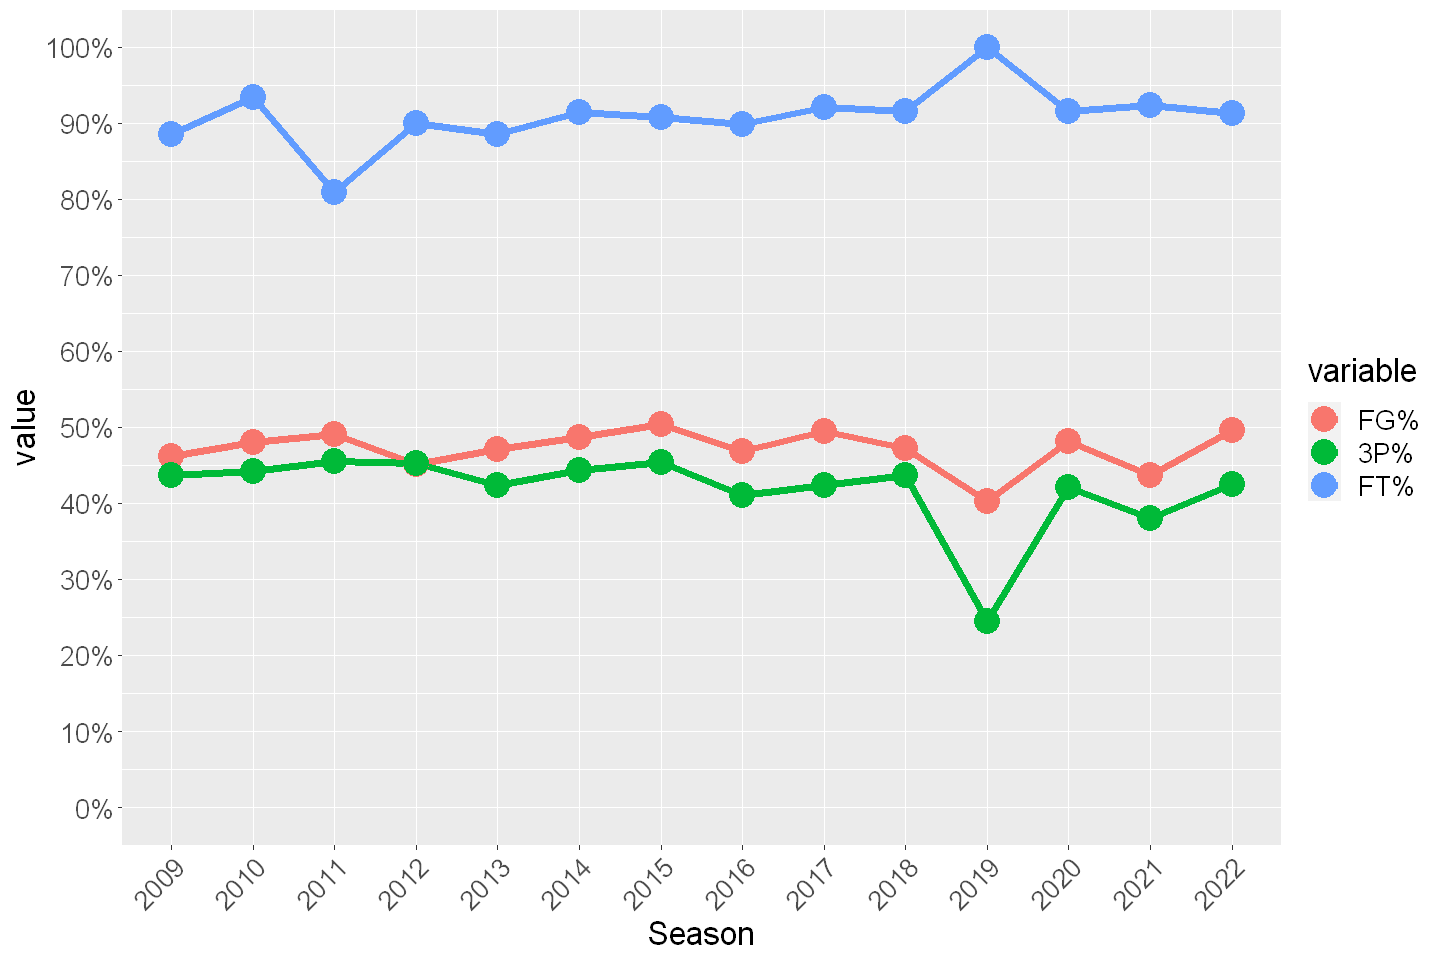

In [18]:
percent_lc <- ggplot(mPercentstats, aes(x=Season, y=value, group=variable, color=variable)) + 
            geom_line(size=2) + 
            geom_point(size=7) +
            scale_y_continuous(limits = c(0,1), breaks=seq(0,1,0.1), labels=scales::percent)
percent_lc <- percent_lc + theme(axis.text.x = element_text(angle=45, vjust=1, hjust=1), text=element_text(size=20))
percent_lc

#### Observation:
* Curry increased his average `PTS` per season except the two years where he was injured and a spike increase during his unanimous MVP season
* Curry's `AST` average began to continually decrease after the 2013-2014 season
* Curry's averaged the most `PTS` and `REB` in the 2020-2021 regular season, and the most `AST` in the 2013-2014 regular season
* Curry has the best shooting split with 50.4/45.4/90.8 (`FG%`/`3P%`/`FT%`) in the 2015-2016 regular season putting him the 50/40/90 club

### Comparing Regular Seasons
Let's look at Curry top 4 best seasons and compare it with his unanimous MVP season `2015-2016` season.

In [19]:
comCompare <- commonstats[commonstats$Season != '2015',]
comCompare <- tail(comCompare[order(comCompare$PTS),], 4)
comCompare[nrow(comCompare) + 1,] <- commonstats[commonstats$Season == '2015',]

In [20]:
comCompare

,Season,PTS,AST,REB
,<chr>,<chr>,<chr>,<chr>
9,2017,26.4,6.1,5.1
10,2018,27.3,5.2,5.3
14,2022,29.4,6.3,6.2
12,2020,32,5.8,5.5
7,2015,30.1,6.7,5.4


In [21]:
mcCompare <- melt(comCompare, 'Season')
mcCompare$value <- as.numeric(mcCompare$value)
mcCompare <- transform(mcCompare, MVP=ifelse(Season=='2015', 'Y', 'N'))

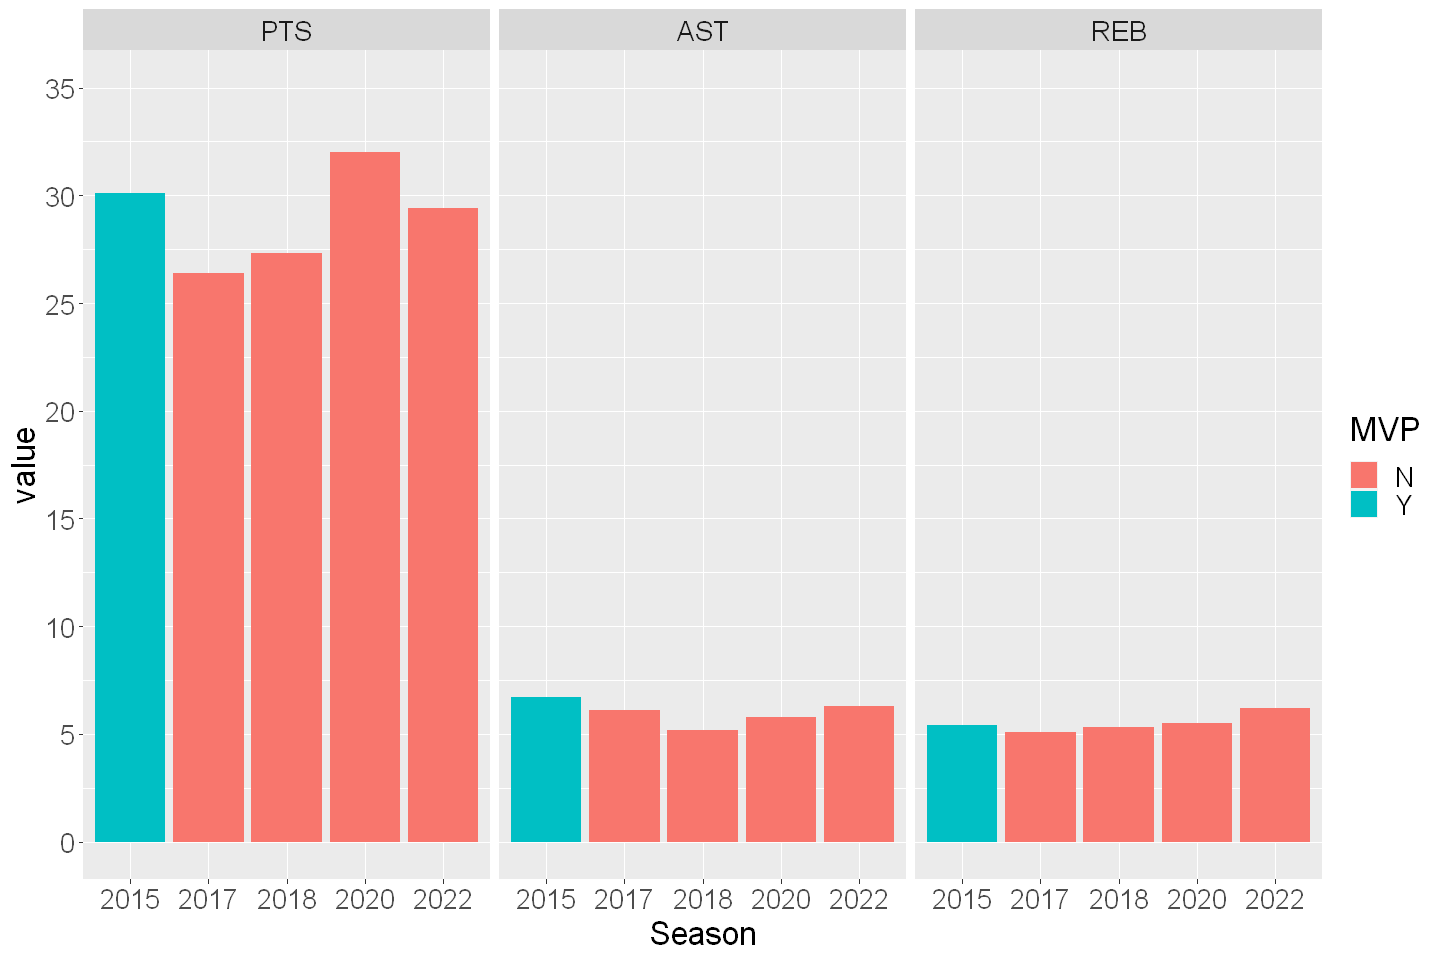

In [22]:
comPlot <- ggplot(mcCompare, aes(x=Season, y=value, fill=MVP)) +
            geom_bar(stat='identity', position='dodge') +
            scale_y_continuous(limits = c(0,35), breaks=seq(0,35,5)) + facet_grid(~ variable) +
            theme(text=element_text(size=20))
comPlot

In [23]:
perCompare <- percentstats[percentstats$Season %in% comCompare$Season,]
perCompare

,Season,FG%,3P%,FT%
,<chr>,<chr>,<chr>,<chr>
7,2015,0.504,0.454,0.907
9,2017,0.495,0.423,0.921
10,2018,0.472,0.437,0.916
12,2020,0.482,0.421,0.916
14,2022,0.496,0.425,0.913


In [24]:
mpCompare <- melt(perCompare, 'Season')
mpCompare$value <- as.numeric(mpCompare$value)
mpCompare <- transform(mpCompare, MVP=ifelse(Season=='2015', 'Y', 'N'))

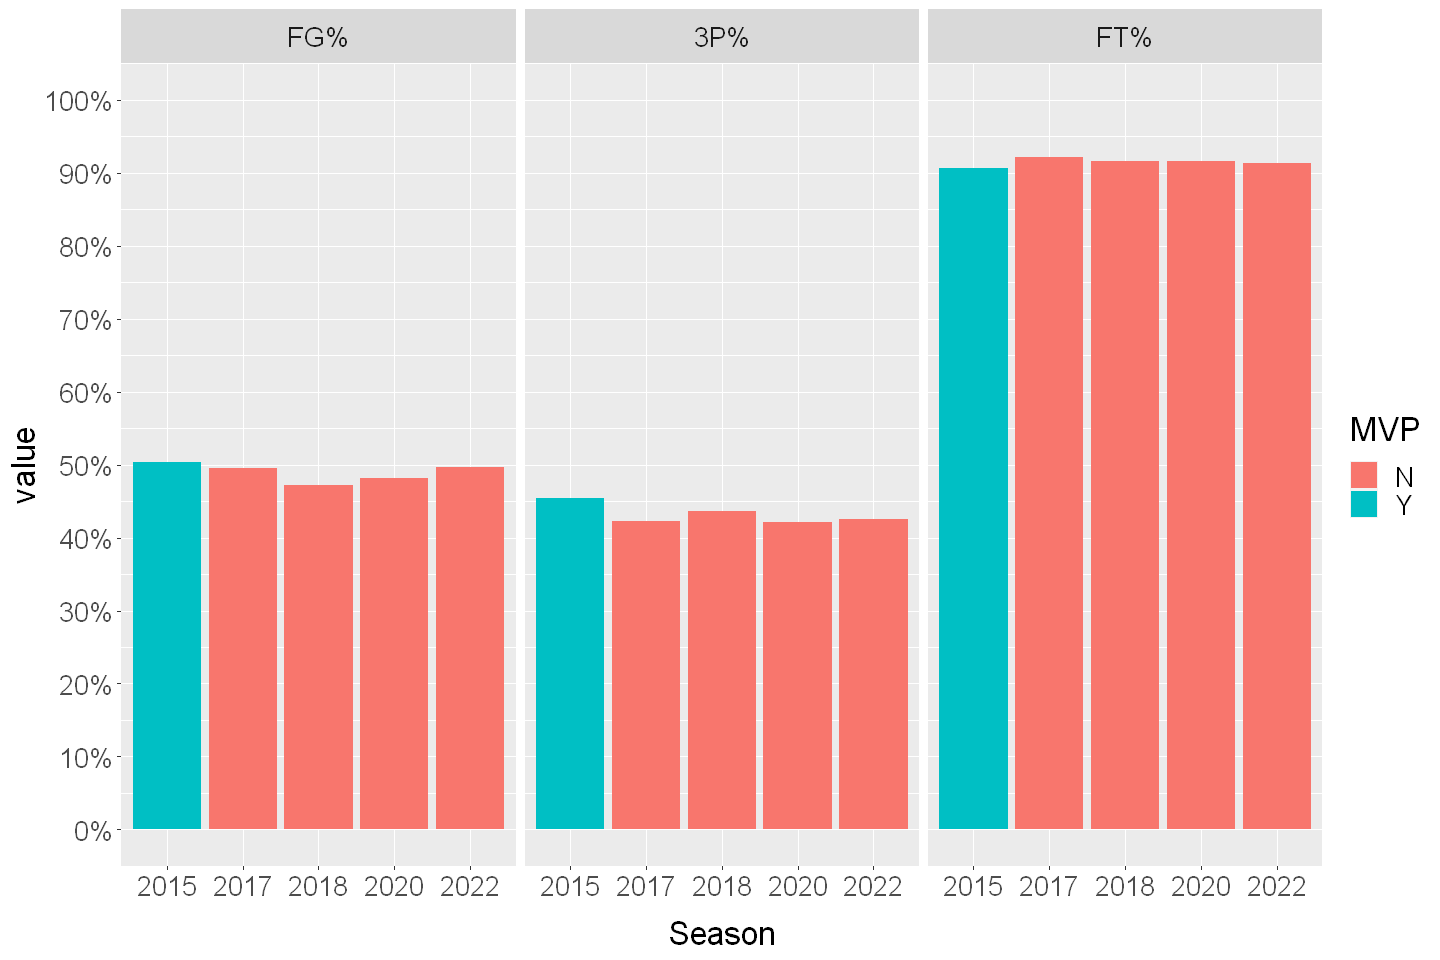

In [25]:
perPlot <- ggplot(mpCompare, aes(x=Season, y=value, fill=MVP)) +
            geom_bar(stat='identity', position='dodge') +
            scale_y_continuous(limits = c(0,1), breaks=seq(0,1,.1), labels=scales::percent) + facet_grid(~ variable) +
            theme(text=element_text(size=20))
perPlot

### Hypothesis Testing

We will be calculating a new column called `TS%` and perform a t.test to see if it is statistically significant.
   * `TS%` = `PTS` / (2 x `TSA`)
   * `TSA` = `FGA` + (0.44 x `FTA`)

`TS%` is the true shooting percentage that measures efficiency that takes into account field goals, 3-point field goals, and free throws. <br/>
`TSA` is the true shooting attempts

In [26]:
mvp <- dbGetQuery(con, 'SELECT "SEASON_ID","PTS", "FGA", "FTA" FROM season_2015')
mvp$TS <- eval(parse(text='PTS/(2 * (FGA + (0.44 * FTA)))'), mvp)
mvp_ts <- mean(mvp$TS)

In [27]:
mvp_ts

[1] 0.7438401

In [28]:
bestTables <- list('season_2017', 'season_2018', 'season_2020', 'season_2022')
for (x in bestTables){
    query <- paste('SELECT "SEASON_ID","PTS", "FGA", "FTA" FROM', x)
    games <- dbGetQuery(con, query)
    
    games$TS <- eval(parse(text='PTS/(2 * (FGA + (0.44 * FTA)))'), games)
    games <- rbind(games, mvp)
    
    var <- if(var.test(TS ~ SEASON_ID, data=games)$p.value > 0.05) TRUE else FALSE
    p_value <- t.test(TS ~ SEASON_ID, data=games, alternative='greater', var.equal=var, conf.level=0.95)$p.value
    cat('P-value with', str_sub(x, -4, -1), 'season:', p_value, '\n')
}

P-value with 2017 season: 0.8981993 
P-value with 2018 season: 0.08298097 
P-value with 2020 season: 0.403251 
P-value with 2022 season: 0.3307947 


In [29]:
dbDisconnect(con)

### Conclusion
Based on our `TS%` metric, none of p-values from our multiple tests was less than the significance level alpha = 0.05. Therefore, we cannot conclude that Stephen Curry's MVP Season is significantly greater than his other top performing seasons. 